## House Prices - Advanced Regression Techniques
### Predict sales prices and practice feature engineering, RFs, and gradient boosting

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. result equally.)

## Practice Skills
Creative feature engineering 

Advanced regression techniques like random forest and gradient boosting

## Evaluation
### Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.aking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### File descriptions

1. train.csv
2. test.csvct.

### Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

### Group Objectives for the assignment
1. How do we collaborate on Github? Create branches for each teammate and keep updating with EDA, and insights. Each member to create their own branch
2. Explore the dataset by 5/12/24,
3. perform EDA and prepare insights to share with the team 
4. How often should we meet? a). Every wednesday, and b). Saturday from 8.a.m to 12 a.m. 

# Data Understanding

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from zipfile import ZipFile
from sklearn.ensemble import RandomForestRegressor


In [2]:
with ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as f:
    f.extractall()

In [3]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

#data exploration
train_df.head()
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train_df.fillna(train_df.mode(), inplace=True)
test_df.fillna(test_df.mode(), inplace=True)

In [5]:
sample_submission_df = pd.read_csv('sample_submission.csv', index_col=False)
sample_submission_df.head
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [6]:
# number of rows with missing data
train_df.isnull().sum()[train_df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# identify the percentage of missing values
train_missing_perectage = train_df.isnull().sum()[train_df.isnull().sum() > 0]/len(train_df)*100
train_missing_perectage

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [8]:
# fill missing data values with mode
train_df = train_df.apply(lambda x: x.fillna(x.mode()[0]), axis=0)
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [9]:
test_missing_perectage = test_df.isnull().sum()[test_df.isnull().sum() > 0]/len(train_df)*100
test_missing_perectage

MSZoning         0.273973
LotFrontage     15.547945
Alley           92.602740
Utilities        0.136986
Exterior1st      0.068493
Exterior2nd      0.068493
MasVnrType      61.232877
MasVnrArea       1.027397
BsmtQual         3.013699
BsmtCond         3.082192
BsmtExposure     3.013699
BsmtFinType1     2.876712
BsmtFinSF1       0.068493
BsmtFinType2     2.876712
BsmtFinSF2       0.068493
BsmtUnfSF        0.068493
TotalBsmtSF      0.068493
BsmtFullBath     0.136986
BsmtHalfBath     0.136986
KitchenQual      0.068493
Functional       0.136986
FireplaceQu     50.000000
GarageType       5.205479
GarageYrBlt      5.342466
GarageFinish     5.342466
GarageCars       0.068493
GarageArea       0.068493
GarageQual       5.342466
GarageCond       5.342466
PoolQC          99.726027
Fence           80.068493
MiscFeature     96.438356
SaleType         0.068493
dtype: float64

In [10]:
test_df = test_df.apply(lambda x: x.fillna(x.mode()[0]), axis=0)
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [11]:
# Check for duplicates in the train and test data
print(f"Number of duplicate rows in the train dataframe: {train_df.duplicated().sum()}")
print(f"Number of duplicate rows in the test dataframe: {test_df.duplicated().sum()}")

Number of duplicate rows in the train dataframe: 0
Number of duplicate rows in the test dataframe: 0


In [12]:
train_cat_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
train_num_columns = train_df.select_dtypes(exclude=['object']).columns.tolist()

In [13]:
test_cat_columns = test_df.select_dtypes(include=['object']).columns.tolist()
test_num_columns = test_df.select_dtypes(exclude=['object']).columns.tolist()

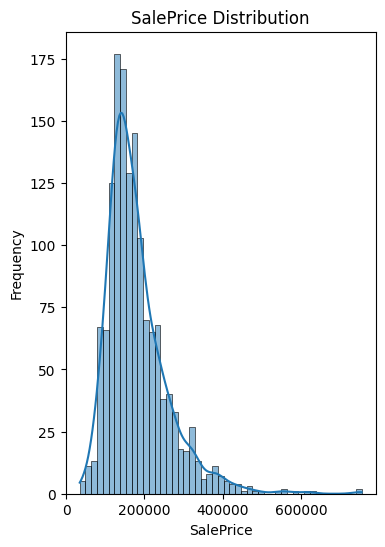

In [14]:
# Plot the distribution of SalePrice
plt.figure(figsize=(4, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

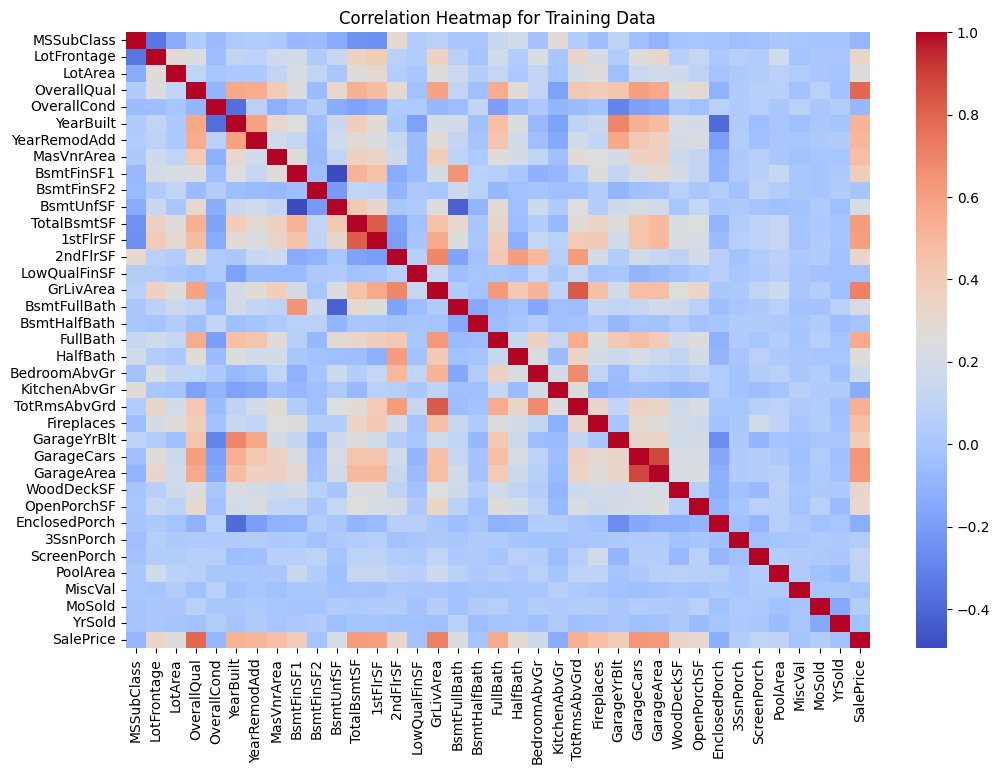

In [15]:
# numerical columns for the training dataframe
train_df_numerical = train_df[train_num_columns]

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df_numerical.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap for Training Data")
plt.show()

In [16]:
train_df_categorical = train_df[train_cat_columns]

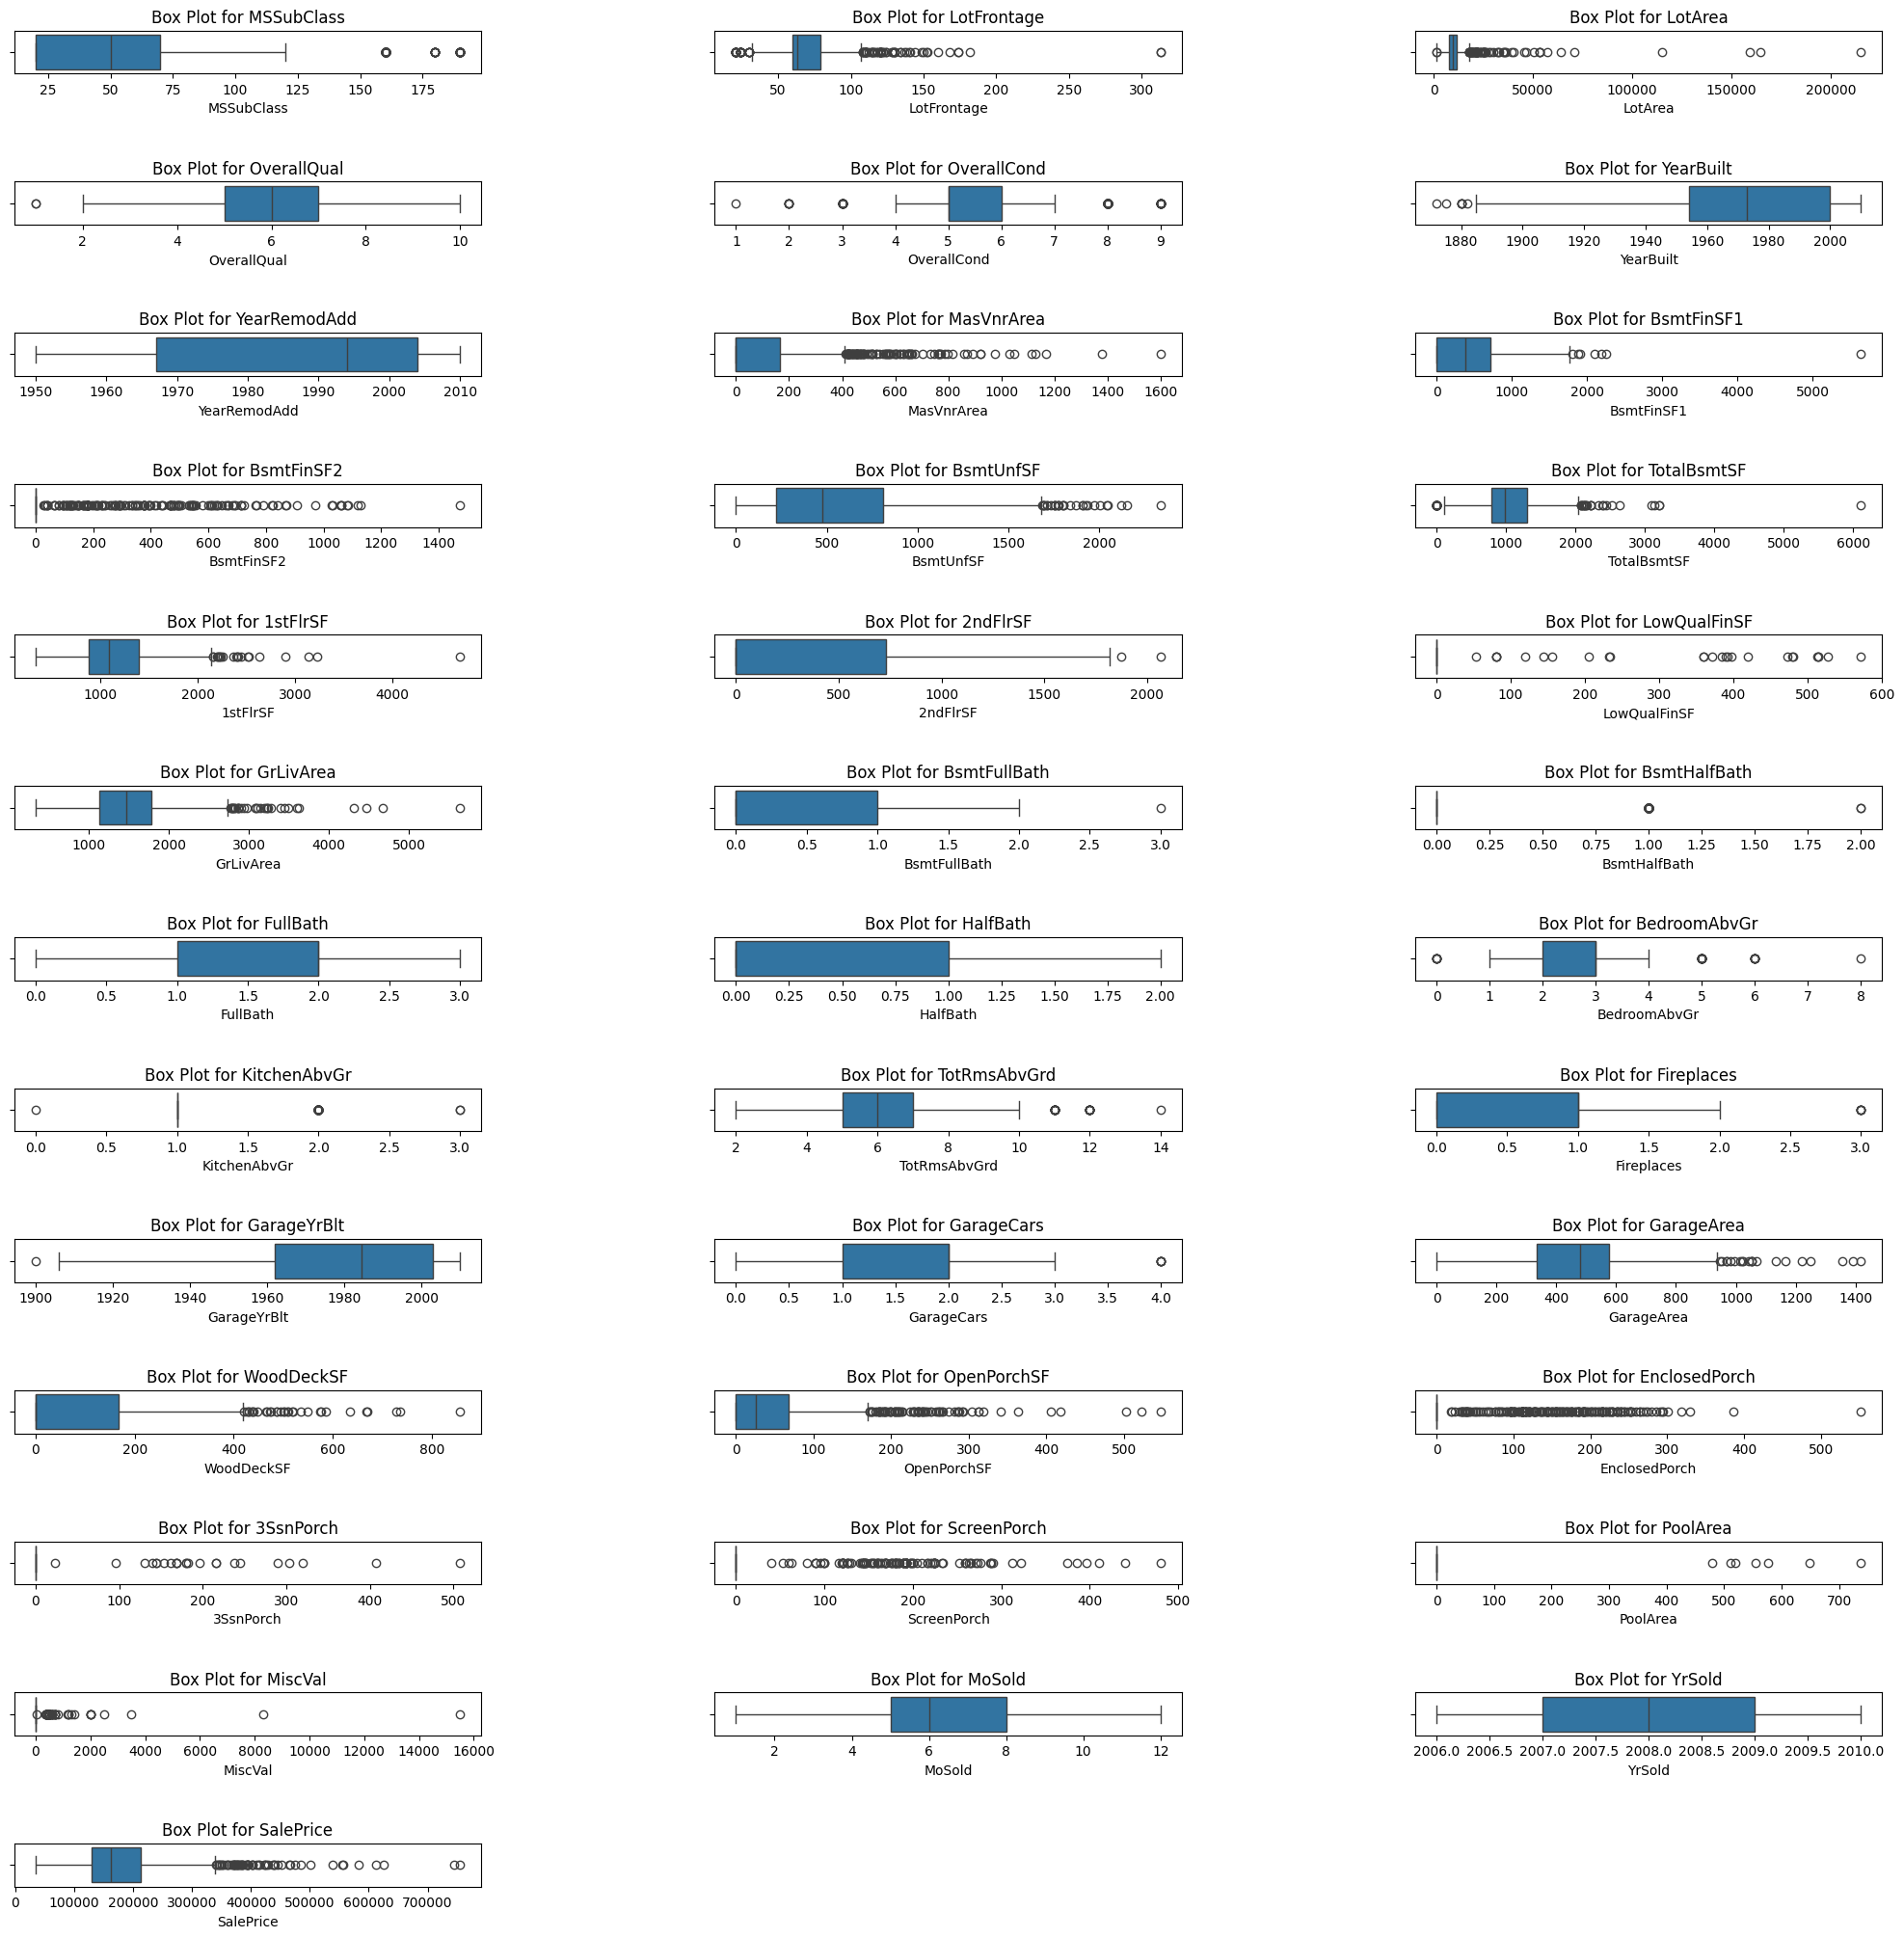

In [17]:
# Set the figure size
plt.figure(figsize=(25, 25))

# Number of columns for the grid of subplots
num_columns = len(train_df_numerical.columns)

# Create box plots for each numerical column
for i, column in enumerate(train_df_numerical.columns):
    plt.subplot(num_columns // 3 + 1, 3, i + 1)  
    sns.boxplot(x=train_df_numerical[column])
    plt.title(f"Box Plot for {column}", fontsize=12)

# Manually adjust the layout to add more spacing between subplots
plt.subplots_adjust(hspace=2.5, wspace=0.5)  # Adjust vertical (hspace) and horizontal (wspace) spacing

# Display the plots
plt.show()


## Data Exploration

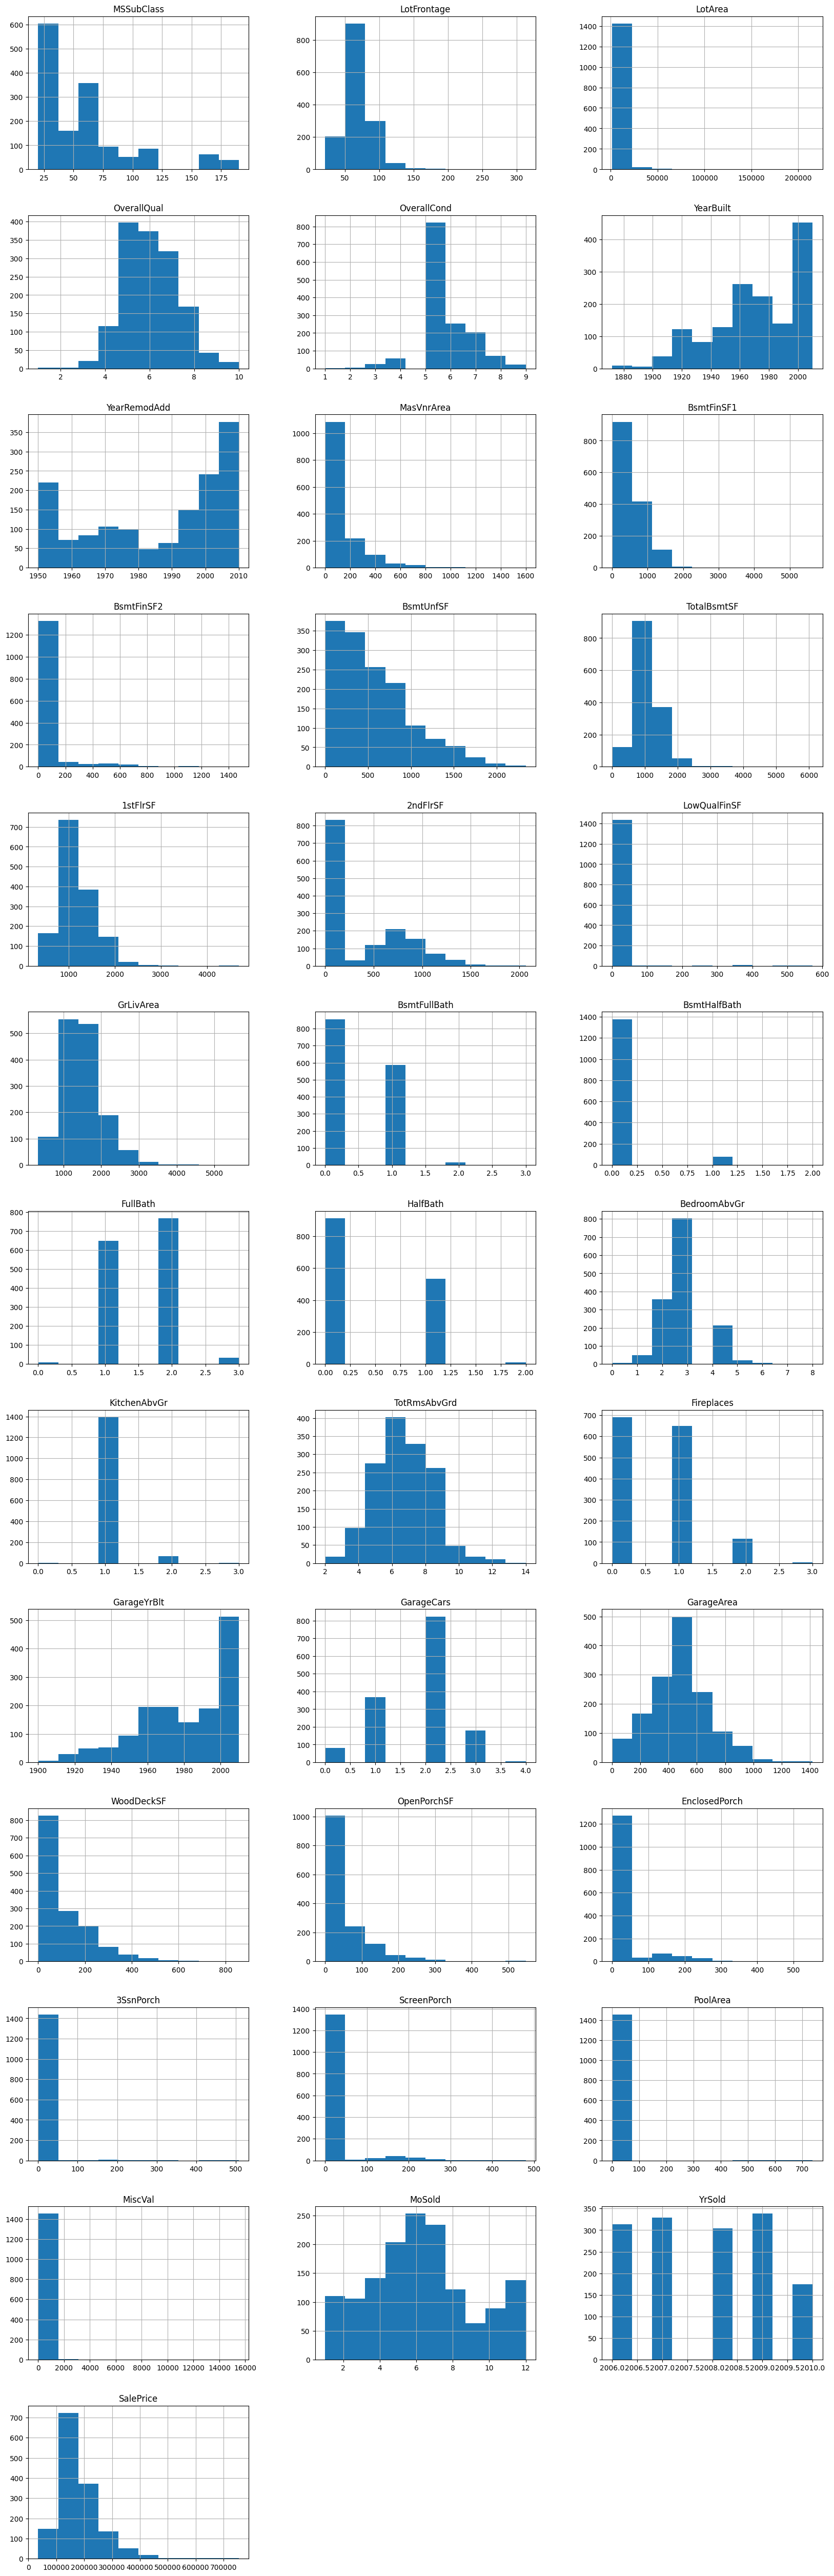

In [18]:
# 
num_columns = len(train_df.columns) # num of columns in the dataframe
columns=3 # num of columns to display histogram
rows = (num_columns // columns) + (num_columns % columns > 0)  # Calculate the number of rows

train_df.hist(figsize= (20, rows*5), bins=10, layout=(rows, columns))

# Adjust the layout to have two columns


plt.show()

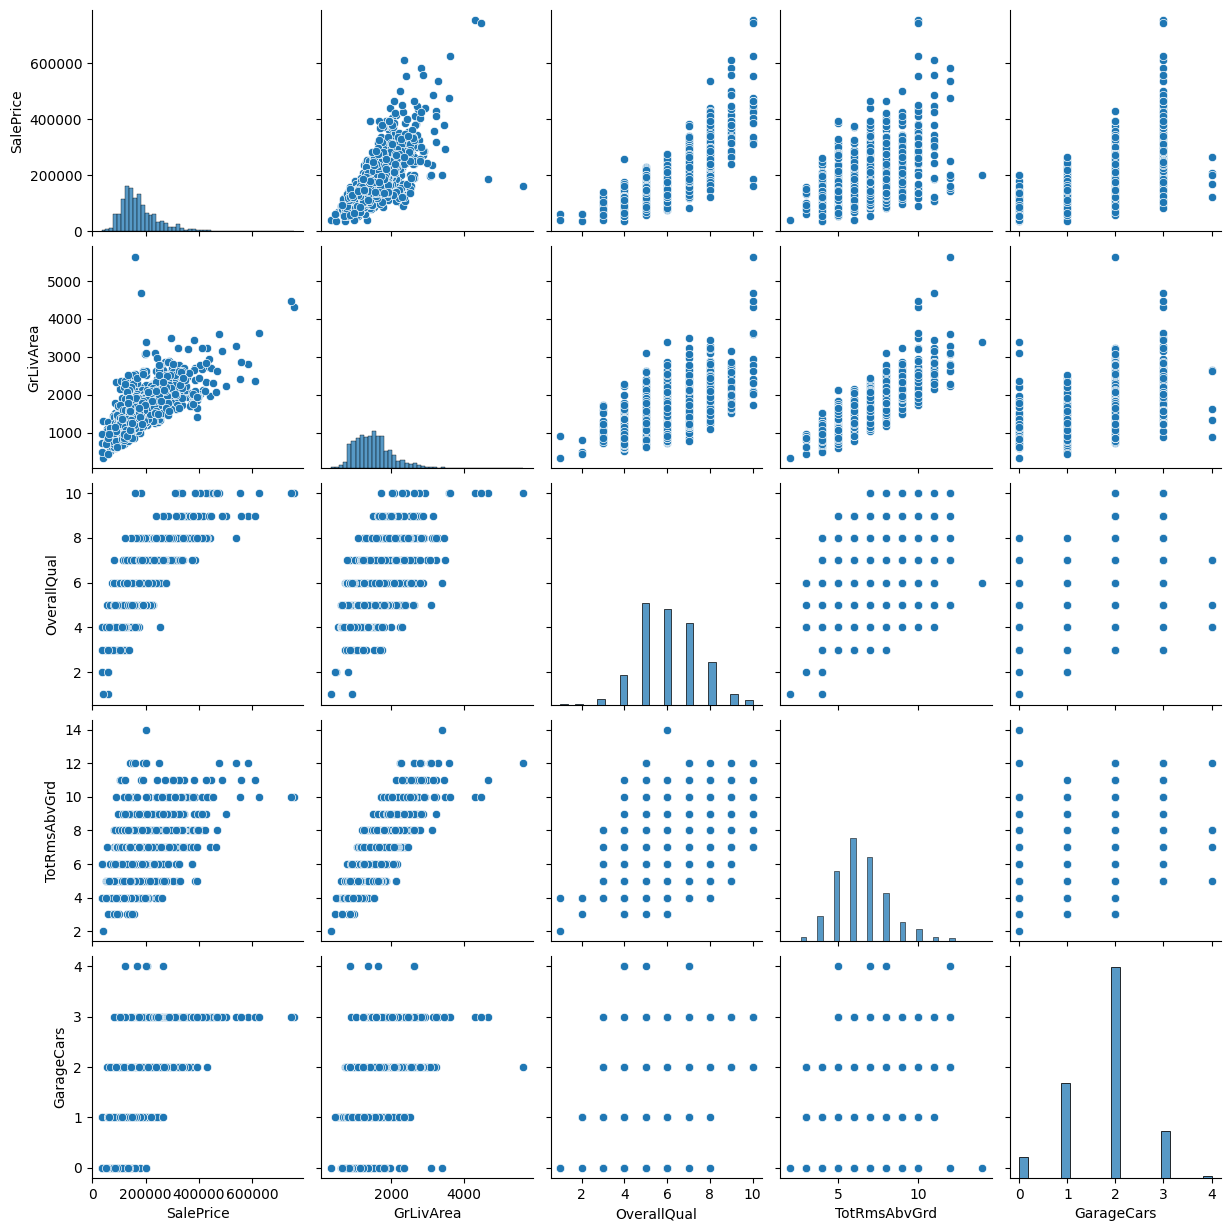

In [19]:
# Pairplot of numerical features
sns.pairplot(train_df[['SalePrice', 'GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars']])
plt.show()

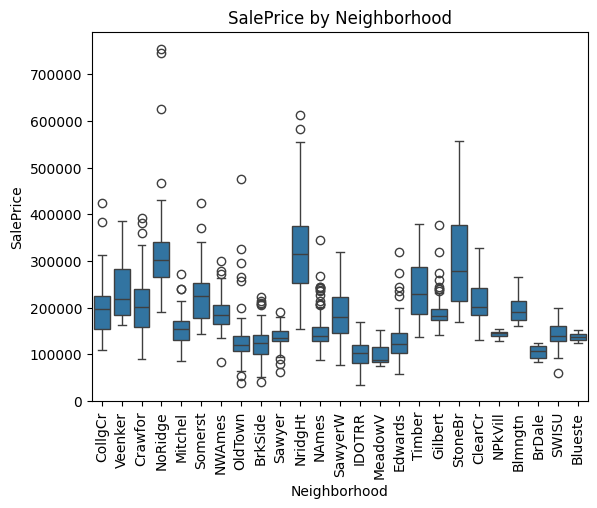

In [20]:
# Boxplot to show SalePrice vs. neighborhood (for categorical feature)
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.xticks(rotation=90)
plt.title("SalePrice by Neighborhood")
plt.show()

In [21]:

# Separate features (X) and target (y)
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Handle categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Initialize and train the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_encoded, y)

# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
feature_importances.head(10)  # Show top 10 important features

,Feature,Importance
3,OverallQual,0.579180
15,GrLivArea,0.110029
11,TotalBsmtSF,0.037386
13,2ndFlrSF,0.031415
8,BsmtFinSF1,0.030341
25,GarageCars,0.024306
12,1stFlrSF,0.023856
26,GarageArea,0.012868
2,LotArea,0.012469
5,YearBuilt,0.008739


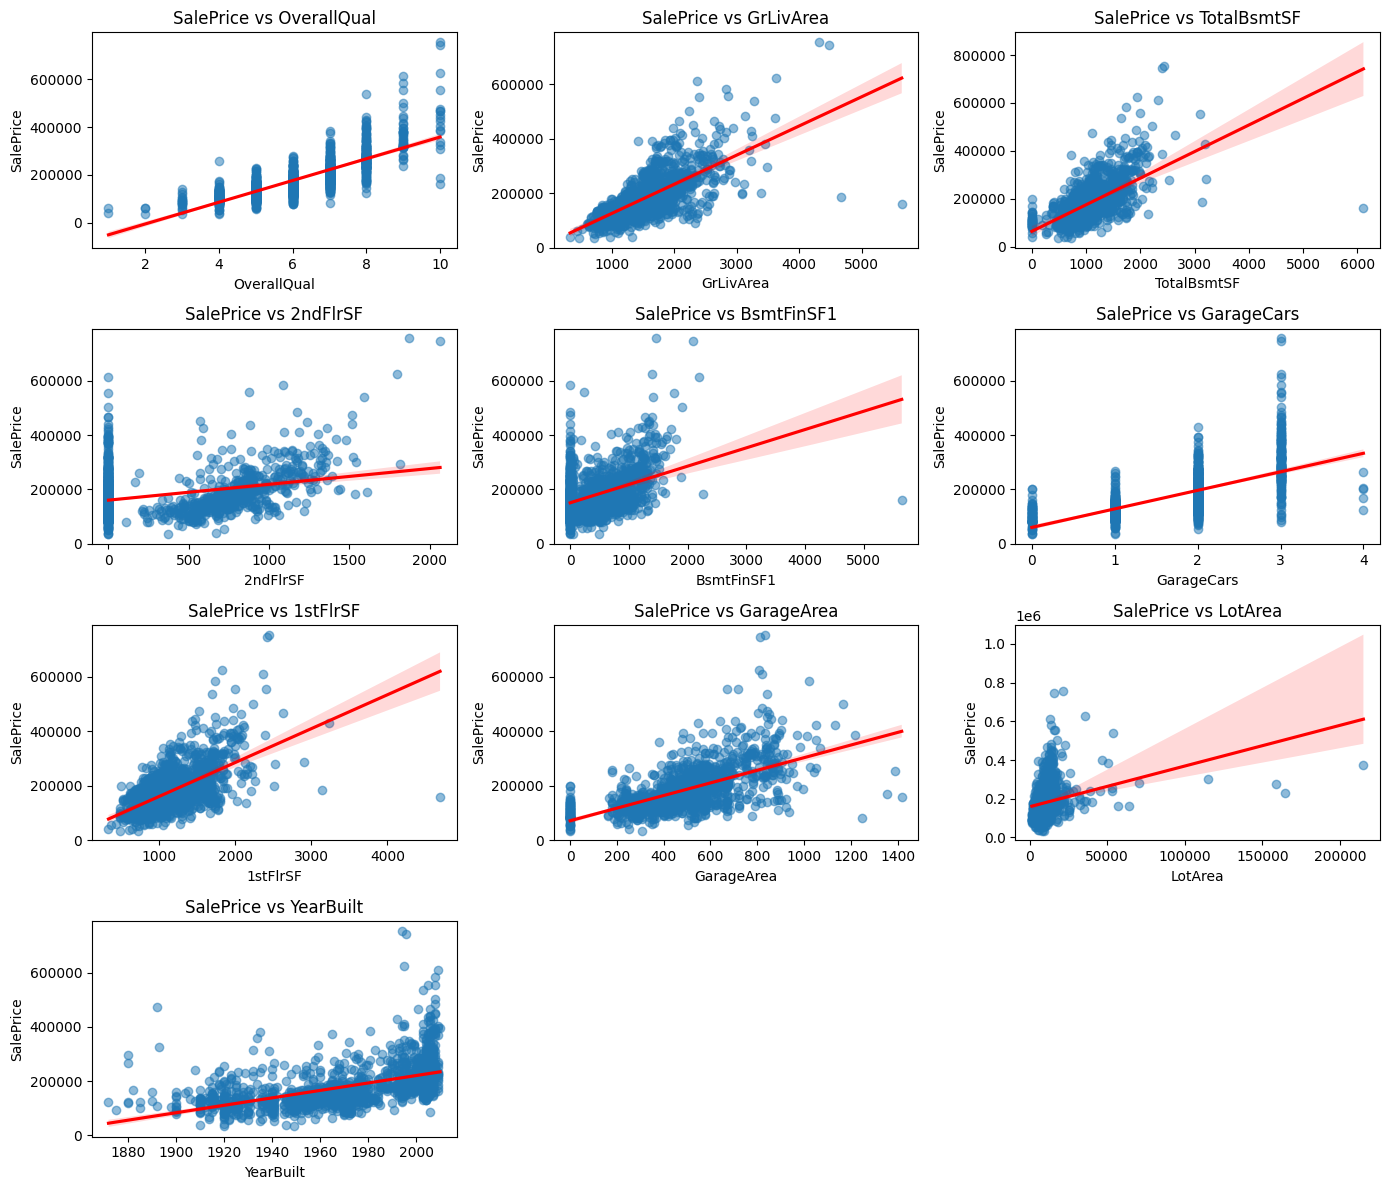

In [22]:
# List of features to plot against SalePrice
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', 
            'GarageCars', '1stFlrSF', 'GarageArea', 'LotArea', 'YearBuilt']

# Set up the figure
plt.figure(figsize=(14, 12))

# Plot each feature against SalePrice
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # Arrange in 3 rows, 4 columns
    sns.regplot(x=feature, y='SalePrice', data=train_df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

# Adjust layout
plt.tight_layout()
plt.show()

### Data Preprocessing

In [23]:
# Feature engineering: Create new features
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['RemodAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [24]:
# Log transformation of SalePrice
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [34]:
# Model 1: Multiple Linear Regression (statsmodels)
# Define the predictors and the target
X = train_df.drop(['SalePrice'], axis=1)  # Drop the target column
y = train_df['SalePrice']

# Handle categorical columns (one-hot encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Add a constant (intercept) to the predictors
X_encoded = sm.add_constant(X_encoded)

# Fit the model
model = sm.OLS(y, X_encoded).fit()

# Print the summary of the model
print(model.summary())

NameError: name 'sm' is not defined

In [33]:
# Model 2: RandomForestRegressor
# Define features and target
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# One-hot encoding categorical features
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
print(X_train_encoded.shape)

X_val_encoded = pd.get_dummies(X_val, drop_first=True)

# Ensure the same columns in both training and validation sets
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='left', axis=1)

# Ensure the target (y_train) is numeric
y_train = pd.to_numeric(y_train, errors='coerce')
print(y_train.shape)

# Fit the model(Random Forest Regression)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

(1168, 242)
(1168,)


RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_val)

In [ ]:
# RMSE (Log-Scale)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f'Training RMSE: {rmse_train}')
print(f'Validation RMSE: {rmse_val}')

In [ ]:
# Model 2: Gradient Boosting (XGBoost)
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

# Predictions
y_pred_train_xg = xg_model.predict(X_train)
y_pred_val_xg = xg_model.predict(X_val)

# RMSE (Log-Scale)
rmse_train_xg = np.sqrt(mean_squared_error(y_train, y_pred_train_xg))
rmse_val_xg = np.sqrt(mean_squared_error(y_val, y_pred_val_xg))

print(f'XGBoost Training RMSE: {rmse_train_xg}')
print(f'XGBoost Validation RMSE: {rmse_val_xg}')

In [ ]:
# Final Predictions on Test Data
test_predictions = xg_model.predict(test_df)  # Using XGBoost model for test data prediction

# Convert back to original scale
test_predictions = np.expm1(test_predictions)  # Reverse the log transformation

# Prepare submission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)
